In [1]:
import os
import sys
from collections import defaultdict
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path192 = "../data/processed/birds_31-03-22-21-08-54/mutspec192_ff.csv"
path12 = "../data/processed/birds_31-03-22-21-08-54/mutspec12_ff.csv"

In [3]:
df12 = pd.read_csv(path12)
df192 = pd.read_csv(path192)

In [4]:
df12

,Mut,ObsFr,Divisor,RawMutSpec,MutSpec,RefNode,AltNode
0,C>T,126,1033,0.121975,0.103600,Node1,Acanthisitta_chloris
1,A>C,126,1069,0.117867,0.100111,Node1,Acanthisitta_chloris
2,C>A,99,1033,0.095837,0.081400,Node1,Acanthisitta_chloris
3,A>G,84,1069,0.078578,0.066741,Node1,Acanthisitta_chloris
4,A>T,61,1069,0.057063,0.048466,Node1,Acanthisitta_chloris
...,...,...,...,...,...,...,...
18259,G>T,0,85,0.000000,0.000000,Node144,Pseudoleistes_virescens
18260,T>G,0,260,0.000000,0.000000,Node144,Pseudoleistes_virescens
18261,T>A,0,260,0.000000,0.000000,Node144,Pseudoleistes_virescens
18262,G>C,0,85,0.000000,0.000000,Node144,Pseudoleistes_virescens


In [5]:
df192["MutBase"] = df192["Mut"].str.slice(2, 5)

In [6]:
df192

,Mut,ObsFr,Divisor,RawMutSpec,MutSpec,RefNode,AltNode,MutBase
0,C[C>T]C,25,270,0.092593,0.008308,Node1,Acanthisitta_chloris,C>T
1,C[C>T]A,24,198,0.121212,0.010876,Node1,Acanthisitta_chloris,C>T
2,C[C>A]C,21,270,0.077778,0.006979,Node1,Acanthisitta_chloris,C>A
3,C[C>A]A,20,198,0.101010,0.009064,Node1,Acanthisitta_chloris,C>A
4,T[A>C]A,18,156,0.115385,0.010353,Node1,Acanthisitta_chloris,A>C
...,...,...,...,...,...,...,...,...
292219,G[T>G]G,0,9,0.000000,0.000000,Node144,Pseudoleistes_virescens,T>G
292220,C[T>G]T,0,32,0.000000,0.000000,Node144,Pseudoleistes_virescens,T>G
292221,G[G>C]A,0,4,0.000000,0.000000,Node144,Pseudoleistes_virescens,G>C
292222,C[C>G]G,0,78,0.000000,0.000000,Node144,Pseudoleistes_virescens,C>G


In [7]:
df192.shape[0] / 192 * 12

18264.0

In [8]:
collapsed192 =df192.groupby(["AltNode", "MutBase"])["RawMutSpec", "MutSpec", "ObsFr", "Divisor"].sum().reset_index()
collapsed192.sort_values(["AltNode", "MutBase"])

/tmp/ipykernel_20667/2516580682.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  collapsed192 =df192.groupby(["AltNode", "MutBase"])["RawMutSpec", "MutSpec", "ObsFr", "Divisor"].sum().reset_index()


,AltNode,MutBase,RawMutSpec,MutSpec,ObsFr,Divisor
0,Acanthisitta_chloris,A>C,1.520573,0.136441,126,1068
1,Acanthisitta_chloris,A>G,1.080752,0.096976,84,1068
2,Acanthisitta_chloris,A>T,0.639273,0.057362,61,1068
3,Acanthisitta_chloris,C>A,1.480574,0.132852,99,1031
4,Acanthisitta_chloris,C>G,0.512090,0.045950,21,1031
...,...,...,...,...,...,...
18259,Zosterops_poliogastrus,G>C,0.058824,0.065311,1,99
18260,Zosterops_poliogastrus,G>T,0.000000,0.000000,0,99
18261,Zosterops_poliogastrus,T>A,0.035714,0.039653,1,318
18262,Zosterops_poliogastrus,T>C,0.210088,0.233259,7,318


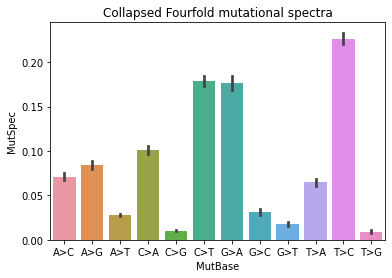

In [15]:
sns.barplot(x="MutBase", y="MutSpec", data=collapsed192,
            order=sorted(collapsed192.MutBase.unique()))
plt.title("Collapsed Fourfold mutational spectra")
plt.show()

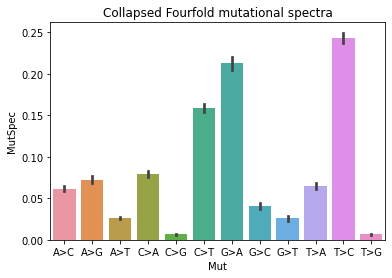

In [16]:
sns.barplot(x="Mut", y="MutSpec", data=df12,
            order=sorted(collapsed192.MutBase.unique()))
plt.title("Collapsed Fourfold mutational spectra")
plt.show()

In [9]:
df12.sort_values(["AltNode", "Mut"])

,Mut,ObsFr,Divisor,RawMutSpec,MutSpec,RefNode,AltNode
1,A>C,126,1069,0.117867,0.100111,Node1,Acanthisitta_chloris
3,A>G,84,1069,0.078578,0.066741,Node1,Acanthisitta_chloris
4,A>T,61,1069,0.057063,0.048466,Node1,Acanthisitta_chloris
2,C>A,99,1033,0.095837,0.081400,Node1,Acanthisitta_chloris
6,C>G,21,1033,0.020329,0.017267,Node1,Acanthisitta_chloris
...,...,...,...,...,...,...,...
14692,G>C,1,99,0.010101,0.133260,Node217,Zosterops_poliogastrus
14696,G>T,0,99,0.000000,0.000000,Node217,Zosterops_poliogastrus
14695,T>A,1,318,0.003145,0.041487,Node217,Zosterops_poliogastrus
14690,T>C,7,318,0.022013,0.290407,Node217,Zosterops_poliogastrus


In [13]:
collapsed192.groupby("AltNode")["RawMutSpec", "MutSpec"].sum()

/tmp/ipykernel_20667/2213621338.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  collapsed192.groupby("AltNode")["RawMutSpec", "MutSpec"].sum()


,RawMutSpec,MutSpec
AltNode,,
Acanthisitta_chloris,11.144550,1.0
Acanthorhynchus_tenuirostris,8.419518,1.0
Accipiter_gentilis,5.552938,1.0
Accipiter_nisus,7.521183,1.0
Accipiter_trivirgatus,7.930018,1.0
...,...,...
Zonotrichia_albicollis,6.841702,1.0
Zosterops_abyssinicus,1.139004,1.0
Zosterops_erythropleurus,5.017236,1.0


## They differ. Need to operate with separate mutNum values to collapse 192 to 12